### Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('delayed_flights_clean.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.sample(10)

,Date,UniqueCarrier,AirTime,Speed,DelayedMinutes,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
305364,2008-02-16,MQ,92.0,4.434783,78.0,408,0.0,0.0,41.0,0.0,37.0
653128,2008-04-06,EV,26.0,5.846154,0.0,152,0.0,0.0,0.0,0.0,0.0
1033304,2008-06-04,AA,287.0,8.724739,0.0,2504,0.0,0.0,0.0,0.0,0.0
1702487,2008-11-21,9E,82.0,7.439024,0.0,610,0.0,0.0,0.0,0.0,15.0
1819901,2008-12-20,US,121.0,7.429752,23.0,899,5.0,0.0,0.0,0.0,18.0
1217994,2008-07-04,AA,122.0,7.614754,20.0,929,20.0,0.0,0.0,0.0,0.0
353227,2008-02-23,AS,221.0,7.511312,0.0,1660,0.0,0.0,0.0,0.0,0.0
802933,2008-05-01,WN,43.0,6.418605,0.0,276,0.0,0.0,0.0,0.0,0.0
588283,2008-04-18,WN,66.0,6.969697,27.0,460,0.0,0.0,0.0,0.0,27.0
197285,2008-02-13,WN,150.0,6.726667,0.0,1009,0.0,0.0,0.0,0.0,0.0


In [3]:
#Our target column aka y
target = 'DelayedMinutes'
#Our features, aka x or predictors
features = list(df.columns)
features.remove(target)
xTrain, xTest, yTrain, yTest = train_test_split(df[features], df[target], test_size = 0.33,
                                               random_state = 1, shuffle = True,
                                               stratify = df['UniqueCarrier'])

In [4]:
#Assess if the stratification is successful by checking percentages of appearance in each strat
def checkStrats(df, xTrain, xTest, labels):
    verdict = True
    for label in labels:
        #build the percentages of appearance in each set for each strat
        dfPercentage = df[df['UniqueCarrier'] == label].shape[0]/df.shape[0]
        trainPercentage = xTrain[xTrain['UniqueCarrier'] == label].shape[0]/xTrain.shape[0]
        testPercentage = xTest[xTest['UniqueCarrier'] == label].shape[0]/xTest.shape[0]
        
        #State the conditionals out of the if to make it more legible. Tolerance of 5%
        condi1 = np.abs((dfPercentage - trainPercentage)) > 0.05
        condi2 = np.abs((dfPercentage - testPercentage)) > 0.05
        condi3 = np.abs((trainPercentage - testPercentage)) > 0.05
        
        if condi1 or condi2 or condi3:
            verdict = verdict*False
        else:
            verdict = verdict*True
    return verdict

In [5]:
#check for correct stratification
labels = df['UniqueCarrier'].unique()
stratsBool = checkStrats(df, xTrain, xTest, labels)
print('Is this a correct stratification?'+ ' Yes'*stratsBool+' No'*(not stratsBool))

Is this a correct stratification? Yes


In [6]:
print('XTrainsize:', xTrain.shape[0])
print('YTrainSize:', yTrain.shape[0])
print('XTestsize:', xTest.shape[0])
print('YTestSize:', yTest.shape[0])
print('Xtype', type(xTrain))
print('Ytype', type(yTrain))

XTrainsize: 1292003
YTrainSize: 1292003
XTestsize: 636361
YTestSize: 636361
Xtype <class 'pandas.core.frame.DataFrame'>
Ytype <class 'pandas.core.series.Series'>


### - Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)

The following operations will be performed on the train sets only. We should really do these operations BEFORE splitting the data.

In [7]:
#Create dummies for every UniqueCarier
dumUC = pd.get_dummies(xTrain['UniqueCarrier'])
xTrainExpanded = pd.concat([xTrain, dumUC], axis = 1)
xTrainExpanded.drop(['Date', 'UniqueCarrier'], axis = 1, inplace = True) #Date is not of interest
xTrainExpanded

,AirTime,Speed,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,AA,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
1166987,50.0,6.500000,325,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
988096,70.0,7.542857,528,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1289890,140.0,7.800000,1092,0.0,0.0,5.0,0.0,31.0,0,0,...,0,0,0,0,0,0,0,0,1,0
720679,46.0,4.652174,214,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
398551,141.0,6.297872,888,26.0,0.0,0.0,0.0,6.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872149,209.0,7.746411,1619,29.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1159680,179.0,8.698324,1557,86.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1286746,53.0,6.283019,333,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
384603,71.0,5.746479,408,6.0,0.0,0.0,0.0,35.0,0,0,...,0,0,0,0,0,0,0,1,0,0


Standarize the numerical columns

In [8]:
#first get a statistical summary
#We use xTrain to avoid describing all the dummy columns
xTrain.describe().applymap(lambda x: f"{x:0.3f}")

,AirTime,Speed,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000
mean,108.261,6.616,764.827,12.376,2.388,9.738,0.057,16.388
std,68.658,1.747,574.094,36.243,17.260,28.204,1.600,35.956
min,1.000,0.355,11.000,0.000,0.000,0.000,0.000,0.000
25%,58.000,5.864,338.000,0.000,0.000,0.000,0.000,0.000
50%,90.000,6.729,606.000,0.000,0.000,0.000,0.000,0.000
75%,137.000,7.469,997.000,10.000,0.000,6.000,0.000,18.000
max,1091.000,932.000,4962.000,2436.000,1352.000,1337.000,357.000,1316.000


Since it seems we are running heavy on outliers, instead of the normal standardscaling, a Robust scaler seems more suitable.

In [9]:
scaled = RobustScaler().fit_transform(xTrainExpanded)
standardXTrain = pd.DataFrame(scaled, columns = xTrainExpanded.columns)
standardXTrain

,AirTime,Speed,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,AA,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,-0.506329,-0.142846,-0.426404,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.253165,0.506751,-0.118361,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.632911,0.666926,0.737481,0.0,0.0,0.833333,0.0,1.722222,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.556962,-1.293860,-0.594841,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.645570,-0.268751,0.427921,2.6,0.0,0.000000,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291998,1.506329,0.633546,1.537178,2.9,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1291999,1.126582,1.226494,1.443096,8.6,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1292000,-0.468354,-0.278004,-0.414264,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1292001,-0.240506,-0.612215,-0.300455,0.6,0.0,0.000000,0.0,1.944444,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
standardXTrain.describe().applymap(lambda x: f"{x:0.3f}")

,AirTime,Speed,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,AA,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
count,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,...,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000
mean,0.231,-0.071,0.241,1.238,2.388,1.623,0.057,0.910,0.027,0.099,...,0.004,0.073,0.041,0.027,0.068,0.073,0.051,0.195,0.053,0.035
std,0.869,1.088,0.871,3.624,17.260,4.701,1.600,1.998,0.161,0.299,...,0.062,0.261,0.198,0.163,0.252,0.260,0.220,0.396,0.225,0.183
min,-1.127,-3.971,-0.903,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.405,-0.539,-0.407,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.595,0.461,0.593,1.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,12.671,576.353,6.610,243.600,1352.000,222.833,357.000,73.111,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Even though outliers still persist, we have now a standarized dataset. Note the some standard deviations are far greatert than 1. This is because this robustScaler uses the median and the interquartile range, which in a normal distribution are related to the mean and the standard deviation. However, this relationship does not always stand, depending on the distribution. If we used the standardScaler:

In [11]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(xTrainExpanded)

nonRobustX = pd.DataFrame(scaled, columns = xTrainExpanded.columns)
nonRobustX.describe().applymap(lambda x: f"{x:0.3f}")

,AirTime,Speed,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,AA,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
count,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,...,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000
mean,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,...,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.562,-3.584,-1.313,-0.341,-0.138,-0.345,-0.036,-0.456,-0.166,-0.331,...,-0.062,-0.281,-0.206,-0.167,-0.271,-0.281,-0.231,-0.492,-0.238,-0.189
25%,-0.732,-0.431,-0.743,-0.341,-0.138,-0.345,-0.036,-0.456,-0.166,-0.331,...,-0.062,-0.281,-0.206,-0.167,-0.271,-0.281,-0.231,-0.492,-0.238,-0.189
50%,-0.266,0.065,-0.277,-0.341,-0.138,-0.345,-0.036,-0.456,-0.166,-0.331,...,-0.062,-0.281,-0.206,-0.167,-0.271,-0.281,-0.231,-0.492,-0.238,-0.189
75%,0.419,0.488,0.404,-0.066,-0.138,-0.133,-0.036,0.045,-0.166,-0.331,...,-0.062,-0.281,-0.206,-0.167,-0.271,-0.281,-0.231,-0.492,-0.238,-0.189
max,14.313,529.651,7.311,66.871,78.192,47.060,223.119,36.144,6.033,3.017,...,16.034,3.557,4.843,5.980,3.692,3.562,4.322,2.031,4.207,5.280


Now we have forced the mean to 0 and std to 1, but we have done so by taking into account the outlier values, so this may distort the sample space.

In [12]:
yTrain.describe().apply("{0:.3f}".format)

count    1292003.000
mean          40.696
std           57.700
min            0.000
25%            0.000
50%           24.000
75%           56.000
max         2461.000
Name: DelayedMinutes, dtype: object

We again find ourselves heavy on outliers

In [13]:
yReshaped = np.array(yTrain).reshape(-1,1)
scaled = RobustScaler().fit_transform(yReshaped)
standardY = pd.Series(scaled.flatten())
standardY.describe().apply("{0:.3f}".format)

count    1292003.000
mean           0.298
std            1.030
min           -0.429
25%           -0.429
50%            0.000
75%            0.571
max           43.518
dtype: object

The yTrain subset seems to be better behaved under the robustScaler.  
Finally we can run some PCA and hopefully reduce the number of columns.

In [14]:
from sklearn.decomposition import PCA

n_components = 6
cols = [f'PCA_{i}' for i in range(n_components)]
pca = PCA(n_components = n_components)
pcaArray = pca.fit_transform(standardXTrain)
xPCA = pd.DataFrame(pcaArray, columns = cols)

In [15]:
exVar = pca.explained_variance_ratio_
cols = xPCA.columns
for label, value in zip(cols, exVar):
    print(label, '=', f'{100*value:.3f}%')

print('Explained total variance ratio', f'{exVar.sum()*100:.3f}%')

PCA_0 = 86.788%
PCA_1 = 6.457%
PCA_2 = 3.811%
PCA_3 = 1.152%
PCA_4 = 0.745%
PCA_5 = 0.573%
Explained total variance ratio 99.527%


It seems we can perfectly work on a 3dimensional space, or even a 2dimensional plane.

### - Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [16]:
#xTrain subset after scaling:
standardXTrain.describe().applymap(lambda x: f"{x:0.3f}")

,AirTime,Speed,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,AA,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
count,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,...,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000,1292003.000
mean,0.231,-0.071,0.241,1.238,2.388,1.623,0.057,0.910,0.027,0.099,...,0.004,0.073,0.041,0.027,0.068,0.073,0.051,0.195,0.053,0.035
std,0.869,1.088,0.871,3.624,17.260,4.701,1.600,1.998,0.161,0.299,...,0.062,0.261,0.198,0.163,0.252,0.260,0.220,0.396,0.225,0.183
min,-1.127,-3.971,-0.903,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.405,-0.539,-0.407,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.595,0.461,0.593,1.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,12.671,576.353,6.610,243.600,1352.000,222.833,357.000,73.111,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Text(0.5, 1.0, 'xTrainSet distribution by column')

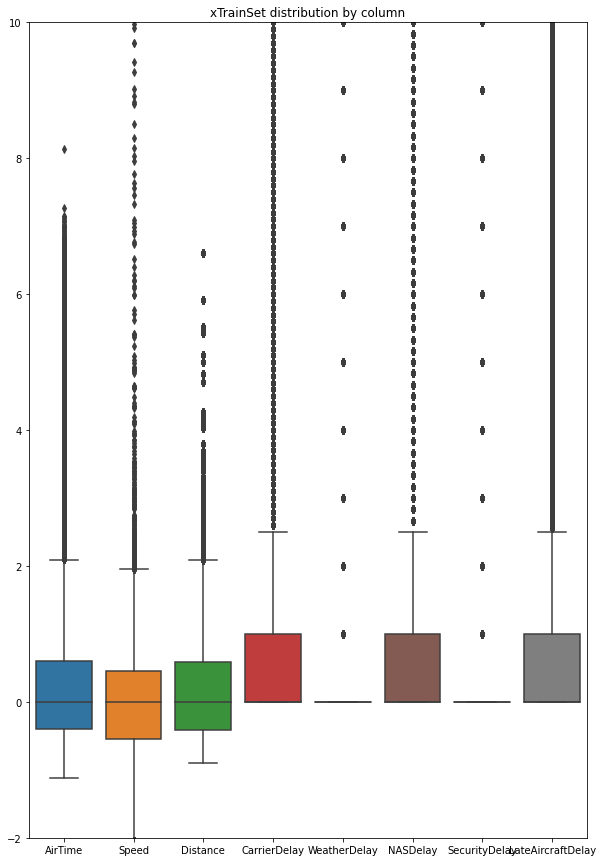

In [17]:
cols = standardXTrain.columns
fig, ax = plt.subplots(figsize = (10,15))
sns.boxplot(data = standardXTrain[cols[:8]], ax = ax)
ax.set_ylim(-2,10) #This is to better visualize the results
ax.set_title('xTrainSet distribution by column')

Take into account that after standarizing the dataset, the values have no magnitude, they become something similar to ratios.

In [18]:
#xTrain after PCA:
xPCA[['PCA_0', 'PCA_1', 'PCA_2']].describe().applymap(lambda x: f"{x:0.3f}")

,PCA_0,PCA_1,PCA_2
count,1292003.000,1292003.000,1292003.000
mean,-0.000,-0.000,0.000
std,17.261,4.708,3.617
min,-4.577,-22.232,-5.759
25%,-2.395,-1.519,-1.335
50%,-2.388,-1.488,-1.319
75%,-2.383,-0.622,0.019
max,1349.515,220.443,240.830


Text(0.5, 1.0, 'xTrainSet, performed PCA, distribution by column')

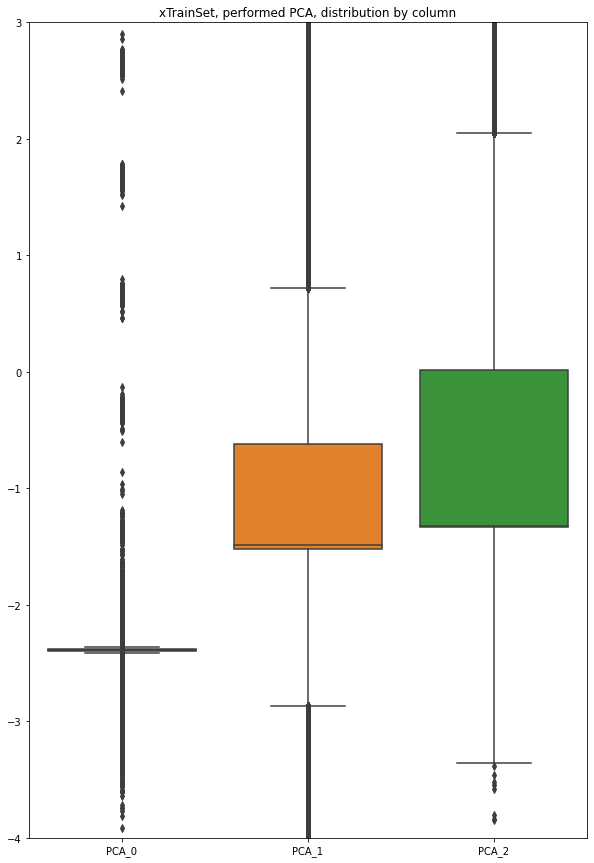

In [19]:
cols = xPCA.columns
fig, ax = plt.subplots(figsize = (10,15))
sns.boxplot(data = xPCA[cols[:3]], ax = ax)
ax.set_ylim(-4,3)#This is to better visualize the results
ax.set_title('xTrainSet, performed PCA, distribution by column')

In [20]:
#yTrain
standardY.describe().apply("{0:.3f}".format)

count    1292003.000
mean           0.298
std            1.030
min           -0.429
25%           -0.429
50%            0.000
75%            0.571
max           43.518
dtype: object

Text(0.5, 1.0, 'yTrainSet distribution')

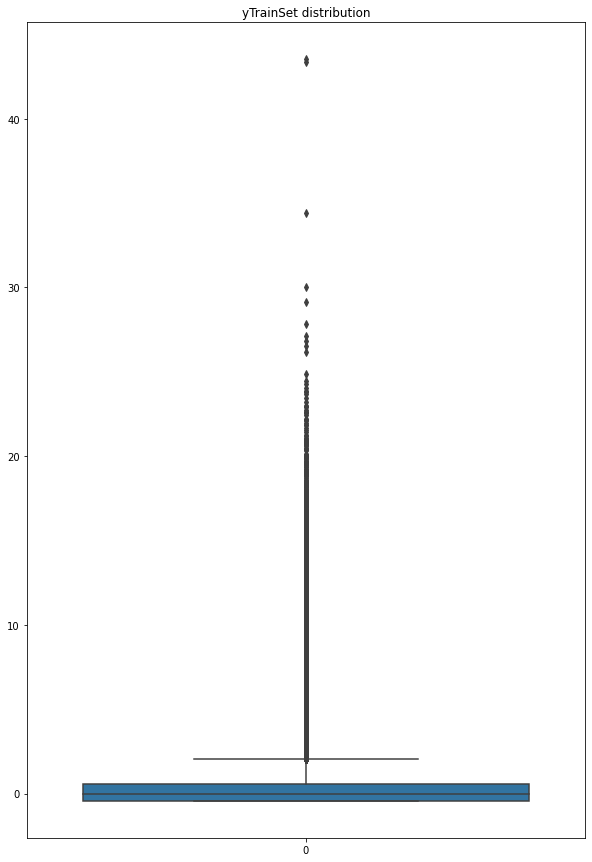

In [21]:
fig, ax = plt.subplots(figsize = (10,15))
sns.boxplot(data = standardY, ax = ax)
#This is to better visualize the results
ax.set_title('yTrainSet distribution')

Text(0.5, 1.0, 'yTrainSet distribution, zoom-in interquartile range')

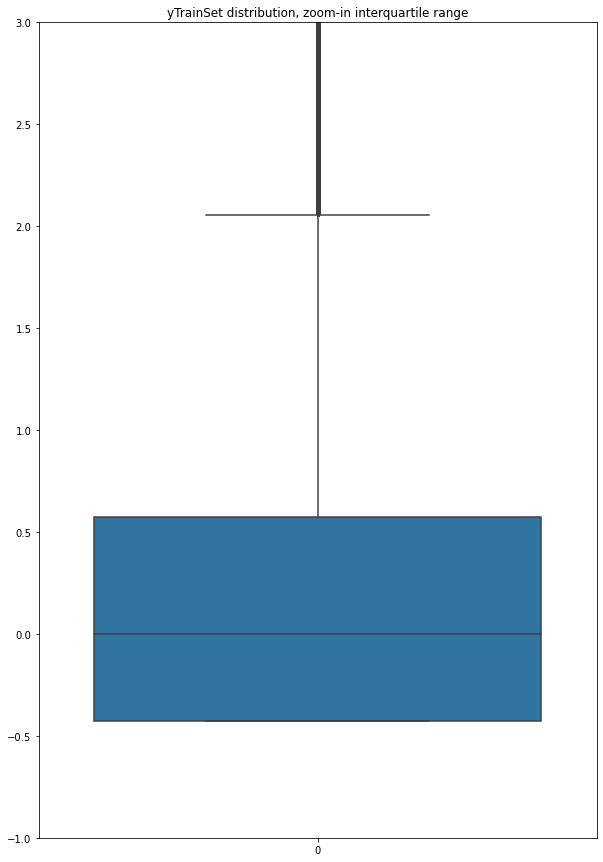

In [22]:
fig, ax = plt.subplots(figsize = (10,15))
sns.boxplot(data = standardY, ax = ax)
ax.set_ylim(-1,3)#This is to better visualize the results
ax.set_title('yTrainSet distribution, zoom-in interquartile range')